# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "C:/Users/Zenbook325E/Downloads/csv"
# dataDir = "D:/AV/Code/location-2"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"
dataDir = "/home/ababil/BUET/AV/location-2"

In [2]:
exec(open('init_notebook.py').read())

current working dir/home/ababil/BUET/AV/Behavior Hypotheses/behavior-hypotheses/src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 210
date = "2023-05-04"
fps=10
minYDisplacement = 5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

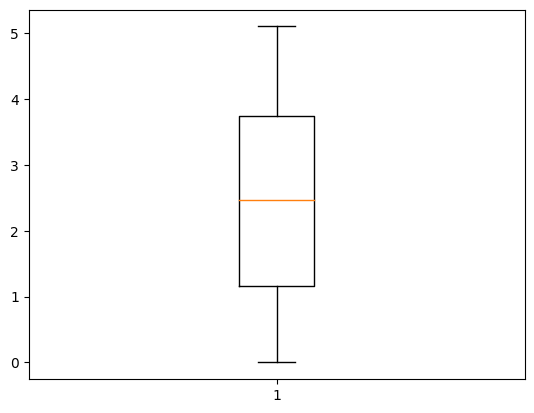

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3520b9a680>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3520b9abc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3520b9a3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3520b9b100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3520b9b3a0>],
 'means': []}

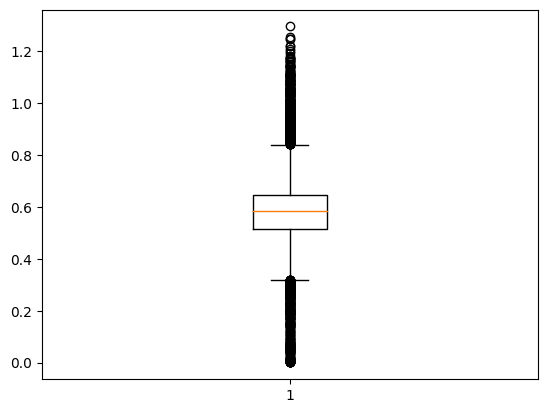

In [6]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        xAccCol='sceneXAcceleration',
        yAccCol='sceneYAcceleration',
        accelerationCol='acceleration'
        
    
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minAcceleration = -10.0,
    maxAcceleration = 10.0,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
transformer.deriveAcceleration(pedDf)
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [7]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
transformer.translateAllToLocalSource(cleanPedDf)

southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate(trackDf)
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y


using min Y displacement (5)


In [8]:

startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1].copy()
startingDf.head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,acceleration,localX,localY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,0.053387,-0.000000,-0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,0.044655,-0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,0.028862,-0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,0.029173,-0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,0.010180,-0.032553,0.389772
5,18,760,18023,210,5.0,0.670135,1.967831,-0.040911,0.486252,-0.011395,0.018314,0.487970,0.040735,0.487023,0.021570,-0.040735,0.487023
6,18,762,18023,210,5.0,0.679707,1.870670,-0.047861,0.485808,0.034750,0.002224,0.488159,0.050307,0.584184,0.034821,-0.050307,0.584184
7,18,764,18023,210,5.0,0.690215,1.773153,-0.052542,0.487584,0.023403,-0.008883,0.490407,0.060815,0.681701,0.025032,-0.060815,0.681701
8,18,766,18023,210,5.0,0.701232,1.674626,-0.055084,0.492634,0.012713,-0.025248,0.495704,0.071832,0.780228,0.028268,-0.071832,0.780228
9,18,768,18023,210,5.0,0.712428,1.575365,-0.055981,0.496305,0.004481,-0.018357,0.499452,0.083028,0.879489,0.018896,-0.083028,0.879489


In [ ]:
plt.boxplot(startingDf["speed"])

In [ ]:
visualizer.show(startingDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
midDf = cleanPedDf[(cleanPedDf["displacementY"] >= 1) & (cleanPedDf["displacementY"] < 4)].copy()
visualizer.show(midDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
plt.boxplot(midDf["speed"])

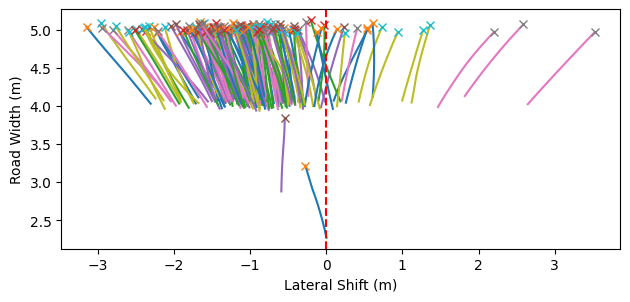

In [9]:
endDf = cleanPedDf[(cleanPedDf["displacementY"] >= 4)].copy()
visualizer.show(endDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f351e7262c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f351e726800>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f351e726020>],
 'medians': [<matplotlib.lines.Line2D at 0x7f351e726d40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f351e726fe0>],
 'means': []}

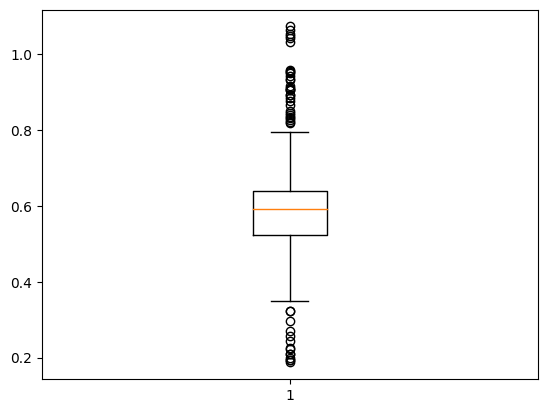

In [10]:
plt.boxplot(endDf["speed"])

<AxesSubplot: xlabel='speed', ylabel='Count'>

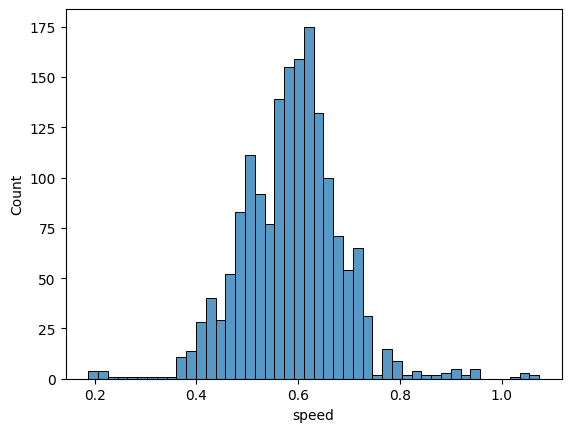

In [11]:
sns.histplot(endDf["speed"])

In [12]:
endDf

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,acceleration,localX,localY
42,18,834,18023,210,5.0,1.110597,-1.549869,-0.099672,0.450486,-0.004309,0.042872,0.461381,0.481197,4.004723,0.043088,-0.481197,4.004723
43,18,836,18023,210,5.0,1.131959,-1.638750,-0.106814,0.444405,0.035712,0.030405,0.457062,0.502559,4.093604,0.046902,-0.502559,4.093604
44,18,838,18023,210,5.0,1.156702,-1.726048,-0.123713,0.436490,0.084492,0.039577,0.453683,0.527302,4.180902,0.093302,-0.527302,4.180902
45,18,840,18023,210,5.0,1.184650,-1.812759,-0.139742,0.433553,0.080147,0.014684,0.455517,0.555250,4.267613,0.081481,-0.555250,4.267613
46,18,842,18023,210,5.0,1.214424,-1.898738,-0.148868,0.429895,0.045632,0.018291,0.454941,0.585024,4.353591,0.049161,-0.585024,4.353591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25886,29,28098,29534,210,5.0,0.774385,-2.095974,-0.193679,0.653773,0.023924,0.042154,0.681858,0.144985,4.550828,0.048470,-1.021780,4.470564
25887,29,28100,29534,210,5.0,0.814397,-2.226974,-0.200064,0.654996,0.031928,-0.006118,0.684869,0.184998,4.681827,0.032509,-1.061793,4.601563
25888,29,28102,29534,210,5.0,0.856071,-2.359426,-0.208370,0.662260,0.041526,-0.036321,0.694267,0.226671,4.814279,0.055169,-1.103467,4.734015
25889,29,28104,29534,210,5.0,0.898967,-2.492571,-0.214476,0.665726,0.030534,-0.017326,0.699422,0.269567,4.947425,0.035107,-1.146362,4.867161


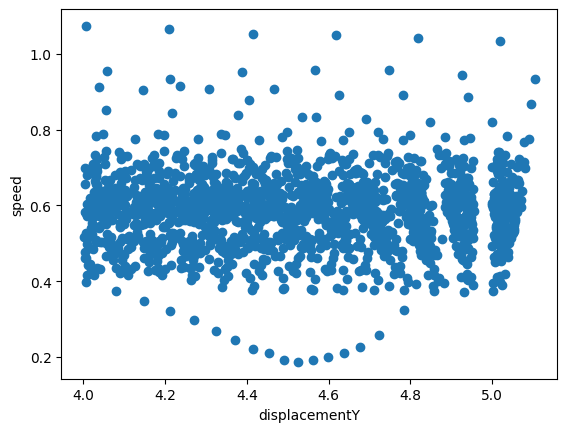

In [13]:
# plot the speed vs displacementY of the pedestrians in the end
plt.scatter(endDf["displacementY"], endDf["speed"])
plt.xlabel("displacementY")
plt.ylabel("speed")
plt.show()

In [21]:
endDf["uniqueTrackId"].unique().shape

(170,)

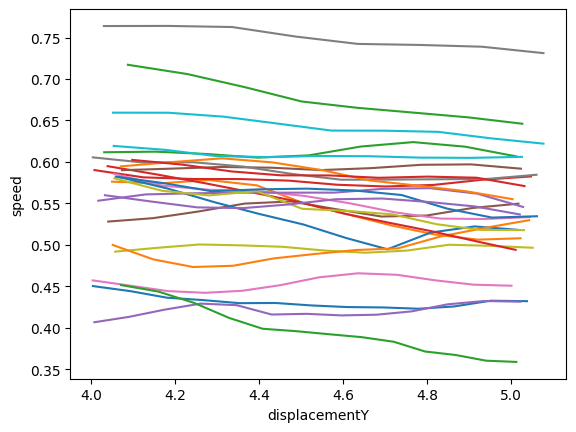

In [28]:
for pedId in endDf["uniqueTrackId"].unique()[:25]:
    trackDf = endDf[endDf["uniqueTrackId"] == pedId]
    plt.plot(trackDf["displacementY"], trackDf["sceneYVelocity"])
plt.xlabel("displacementY")
plt.ylabel("speed")
plt.show()

In [42]:
# find the distribution of pedestrians in the end according to increase/decrease in speed
# new df with each ped and majority speedChange
tempDf = pd.DataFrame(columns=["uniqueTrackId", "speedChange"])
tempDf["uniqueTrackId"] = endDf["uniqueTrackId"].unique()
tempDf["speedChange"] = 0

# first speedChange of each pedestrian is 0
for pedId in endDf["uniqueTrackId"].unique():
    trackDf = endDf[endDf["uniqueTrackId"] == pedId]
    trackDf["speedChange"] = trackDf["sceneYVelocity"].diff()
    # count the number of times the speedChange is positive and negative
    positiveSpeedChange = trackDf[trackDf["speedChange"] > 0].shape[0]
    negativeSpeedChange = trackDf[trackDf["speedChange"] < 0].shape[0]
    if positiveSpeedChange > negativeSpeedChange:
        tempDf.loc[tempDf["uniqueTrackId"] == pedId, "speedChange"] = 1
    elif positiveSpeedChange < negativeSpeedChange:
        tempDf.loc[tempDf["uniqueTrackId"] == pedId, "speedChange"] = -1
    else:
        tempDf.loc[tempDf["uniqueTrackId"] == pedId, "speedChange"] = 0
        
tempDf["speedChange"].value_counts()

/tmp/ipykernel_234036/1745849140.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackDf.loc[:, "speedChange"] = trackDf["sceneYVelocity"].diff()


-1    105
 1     47
 0     18
Name: speedChange, dtype: int64

In [29]:
pedDf.head(5)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,acceleration
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,0.053387
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,0.044655
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,0.028862
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,0.029173
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,0.010180
